In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import requests
# from bs4 import BeautifulSoup # html 문서를 파싱할 때 사용하므로 AJAX로 넘어오는 데이터를 크롤링 할 때 사용하지 않는다.
import json # json 형태의 문자열을 파이썬에서 처리하기 위해 loads() 메소드로 딕셔너리나 리스트 형태로 변환한다.

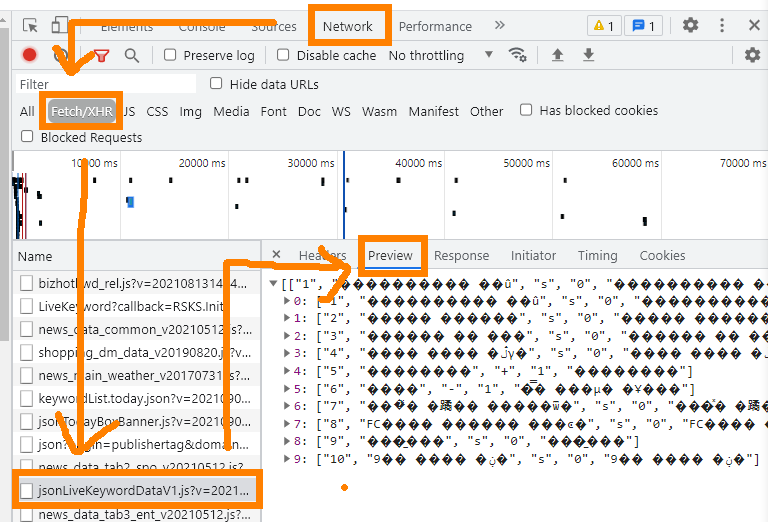

In [2]:
from IPython.display import Image
Image('nateAjax.png', width='700')

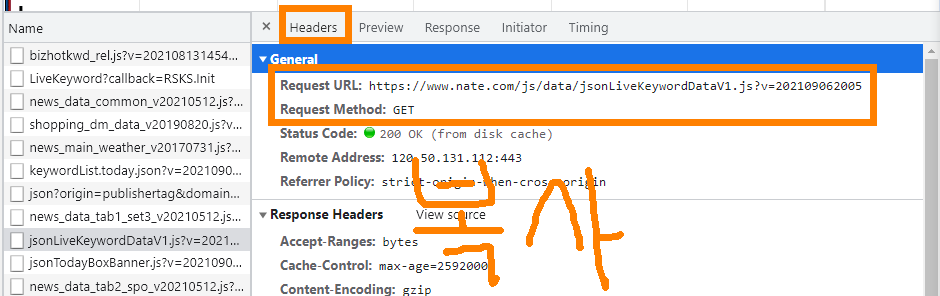

In [3]:
from IPython.display import Image
Image('nateAjax_2.png', width='800')

In [4]:
# 실시간 검색어가 웹 페이지에 전부 혹은 일부가 포함되어있지 않고 ajax를 이용해서 받아오는 방식이 사용된다.
# Request Method가 GET 이므로 reauests 모듈의 get() 메소드를 사용해서 실시간 검색어를 받아온다.
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202109062010'
request = requests.get(targetSite)
print(request)
# 파이썬은 한글 encoding이 유니코드(UTF-8)로 되어있기 때문에 encoding이 'euc-kr' 방식으로 되어있을 경우 사이트를 크롤링
# 할 때 한글이 깨져서 보이면 아래와 같이 한글 encoding을 바꿔준다.
request.encoding = 'euc-kr'

<Response [200]>


In [5]:
issues = request.text
print(type(issues))
print(issues)

<class 'str'>
[["1",  "국민지원금 신청",  "s",  "0",  "국민지원금 신청"], ["2",  "오세훈 경찰인가 하명",  "s",  "0",  "오세훈 경찰인가 하명"], ["3",  "생방송 투데이",  "s",  "0",  "생방송 투데이"], ["4",  "코로나 19 검사에",  "s",  "0",  "코로나 19 검사에"], ["5",  "생생정보",  "s",  "0",  "생생정보"], ["6",  "유재석",  "+",  "3",  "유재석"], ["7",  "文대통령 특별재난지역 선포",  "-",  "1",  "文대통령 특별재난지역 선포"], ["8",  "두 번째 남편",  "+",  "2",  "두 번째 남편"], ["9",  "랄랄",  "-",  "1",  "미우 오민석 랄랄"], ["10",  "빨강 구두",  "n",  "0",  "빨강 구두"]]


In [6]:
# json 문자열 형태로 얻어온 실시간 이슈 키워드는 json 모듈의 loads() 메소드를 사용해서 파이썬에서 처리할 수 있는 데이터
# 타입으로 변환시켜 처리한다.
# loads() 메소드는 json 타입의 문자열이 {}를 포함하는 형태면 딕셔너리로 []만 포함하는 형태면 리스트로 자동 변환된다.
ranks = json.loads(issues)
print(type(ranks))
print(issues)

<class 'list'>
[["1",  "국민지원금 신청",  "s",  "0",  "국민지원금 신청"], ["2",  "오세훈 경찰인가 하명",  "s",  "0",  "오세훈 경찰인가 하명"], ["3",  "생방송 투데이",  "s",  "0",  "생방송 투데이"], ["4",  "코로나 19 검사에",  "s",  "0",  "코로나 19 검사에"], ["5",  "생생정보",  "s",  "0",  "생생정보"], ["6",  "유재석",  "+",  "3",  "유재석"], ["7",  "文대통령 특별재난지역 선포",  "-",  "1",  "文대통령 특별재난지역 선포"], ["8",  "두 번째 남편",  "+",  "2",  "두 번째 남편"], ["9",  "랄랄",  "-",  "1",  "미우 오민석 랄랄"], ["10",  "빨강 구두",  "n",  "0",  "빨강 구두"]]


In [7]:
# json 모듈을 사용하지 않으려면 requests 모듈의 json() 메소드를 사용해서 파이썬에서 처리할 수 있는 데이터 타입으로 변환시켜
# 사용한다.
ranks = request.json()
print(type(ranks))
print(issues)

<class 'list'>
[["1",  "국민지원금 신청",  "s",  "0",  "국민지원금 신청"], ["2",  "오세훈 경찰인가 하명",  "s",  "0",  "오세훈 경찰인가 하명"], ["3",  "생방송 투데이",  "s",  "0",  "생방송 투데이"], ["4",  "코로나 19 검사에",  "s",  "0",  "코로나 19 검사에"], ["5",  "생생정보",  "s",  "0",  "생생정보"], ["6",  "유재석",  "+",  "3",  "유재석"], ["7",  "文대통령 특별재난지역 선포",  "-",  "1",  "文대통령 특별재난지역 선포"], ["8",  "두 번째 남편",  "+",  "2",  "두 번째 남편"], ["9",  "랄랄",  "-",  "1",  "미우 오민석 랄랄"], ["10",  "빨강 구두",  "n",  "0",  "빨강 구두"]]


In [8]:
for rank in ranks:
    print(rank)

['1', '국민지원금 신청', 's', '0', '국민지원금 신청']
['2', '오세훈 경찰인가 하명', 's', '0', '오세훈 경찰인가 하명']
['3', '생방송 투데이', 's', '0', '생방송 투데이']
['4', '코로나 19 검사에', 's', '0', '코로나 19 검사에']
['5', '생생정보', 's', '0', '생생정보']
['6', '유재석', '+', '3', '유재석']
['7', '文대통령 특별재난지역 선포', '-', '1', '文대통령 특별재난지역 선포']
['8', '두 번째 남편', '+', '2', '두 번째 남편']
['9', '랄랄', '-', '1', '미우 오민석 랄랄']
['10', '빨강 구두', 'n', '0', '빨강 구두']


In [9]:
for rank in ranks:
    print('{0:>2s}위: {1} '.format(rank[0], rank[1]), end='')
    if rank[2] == '+':
        print('[{}{}]'.format('↑', rank[3]))
    elif rank[2] == '-':
        print('[{}{}]'.format('↓', rank[3]))
    elif rank[2] == 's':
        print('[-]')
    else:
        print('new')

 1위: 국민지원금 신청 [-]
 2위: 오세훈 경찰인가 하명 [-]
 3위: 생방송 투데이 [-]
 4위: 코로나 19 검사에 [-]
 5위: 생생정보 [-]
 6위: 유재석 [↑3]
 7위: 文대통령 특별재난지역 선포 [↓1]
 8위: 두 번째 남편 [↑2]
 9위: 랄랄 [↓1]
10위: 빨강 구두 new
